# Fraud Detection Project - EDA

Contents:

* [Data Understanding](#Data-Understanding)
    - [Importing Data](#Importing-Data)
    - [Describing Data](#Describing-Data)
    - [Tidying Data](#Tidying-Data)
* [Data Preparation](#Data-Preparation)
    - [Selecting Data](#Selecting-Data)
    - [Cleaning Data](#Cleaning-Data)
    - [Exploratory Data Analysis (EDA)](#EDA)
        + Basic Analysis
        + Univariate EDA
          - Categorical Data
          - Numerical Data
        + Multivariate EDA
          - Correlation and Covariance
          - Scatterplots

## Data Understanding

### Importing Data

In [1]:
# Import necessary modules
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

In [2]:
df = pd.read_pickle("/Users/stb/Documents/Github/fraud-detection/data/autos_20190708.pkl")
# df = pd.read_csv("/Users/stb/Documents/Github/fraud-detection/data/autos_20190708.csv")

### EDA

Exploratory data analysis is generally cross-classified in two ways. First, each method is either non-graphical or graphical. And second, each method is either univariate or multivariate (usually just bivariate).
 > The four types of EDA are: univariate non-graphical, multivariate nongraphical, univariate graphical, and multivariate graphical.

Non-graphical methods generally involve calculation of summary statistics, while graphical methods obviously summarize the data in a diagrammatic or pictorial way. Univariate methods look at one variable (data column) at a time, while multivariate methods look at two or more variables at a time to explore
relationships. Usually our multivariate EDA will be bivariate (looking at exactly two variables), but occasionally it will involve three or more variables. It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.


[source](https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf)

#### Basic Analysis

In [3]:
df.shape

(15919, 136)

In [4]:
df.head(3)

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,99.0,NaN,3.0,1422.0,Audi,A1,0588/BDF,06/2021,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,NaT,Sedans,Black,Automatic,NaN,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1220.0
1,129.0,NaN,4.0,1798.0,Audi,A1,0588/BCY,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,5.6,NaT,Sedans,Red,Automatic,7.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1255.0
2,99.0,NaN,NaN,1598.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,NaT,Sedans,Black,Automatic,NaN,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [5]:
df.tail(3)

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
15916,139.0,Austria,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,146.0,15.0,Espace16,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,False,5.3,NaT,Van,White,Automatic,6.0,1,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
15917,139.0,NaN,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,147.0,10.0,2691331,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,False,5.3,NaT,Van,Grey,Automatic,6.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1758.0
15918,153.0,Germany,4.0,1798.0,Renault,Espace,3333/BHJ,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,165.0,NaN,Re_30000008029,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,False,6.8,NaT,Van,Grey,Automatic,NaN,1,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1685.0


In [6]:
df.describe()

,co2_emission,cylinders,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,gears,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,available_after_days,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
count,13483.000000,10239.000000,15423.000000,15831.000000,14895.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,13036.000000,11207.000000,15919.000000,15919.000000,14322.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,635.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,8945.000000
mean,117.953942,3.797343,1423.540881,88.367696,34130.127828,0.945973,0.087233,0.136641,0.128674,0.086430,0.850706,0.160474,0.697061,0.033876,0.930709,0.882841,0.210953,0.105510,0.549776,0.146348,0.702885,0.786236,0.368615,0.205195,0.204459,0.005021,0.899444,0.910424,0.057977,0.883912,0.709915,0.736694,0.132289,0.236928,4.784527,5.924601,0.224260,18019.896727,1.542382,0.800963,0.329392,0.153249,0.639739,0.402406,0.820763,0.824270,0.154005,0.002406,0.560880,76.725984,...,0.000067,0.066871,0.792119,0.124408,0.062471,0.040403,0.201147,0.449697,0.174212,0.003200,0.625775,0.511501,0.215081,0.024002,0.738916,0.544436,0.036736,0.679379,0.228082,0.051203,0.389226,0.646

Summary statistics of numeric columns show that:
- `max` value of 'co2_emission' column is problematic
- `max` value of 'displacement' column is problematic
- `min` value of 'hp' is problematic
- `max` value of 'price' is not really high as one might expect
- `min` value of 'price' is problematic
- `min` of 'km' is 0 which may be problematic
- `min` of 'consumption_comb' is 0 which is be problematic. We may need to change that to NaN
- `min` of 'weight_kg' is very low (1)

In [7]:
# Describe the columns with "object" data type
df.describe(include = "object")

,country_version,make,model,model_code,next_inspection,body_type,description,offer_number,body,body_color,gearing_type,paint_type,short_description,vat,drive_chain,electricity_consumption,emission_class,emission_label,fuel,type,upholstery,url
count,7586,15919,15919,4978,2825,15859,15919,12744,15859,15322,15919,10147,15873,11406,9061,137,12291,3945,15919,15917,12199,15919
unique,23,3,9,232,68,9,1,11440,9,14,3,3,10001,2,3,1,6,5,77,5,46,15919
top,Germany,Opel,A3,0035/BCB,06/2021,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,TP62881,Sedans,Black,Manual,Metallic,SPB 1.6 TDI 116 CV S tronic Sport,VAT deductible,front,0,Euro 6,4 (Green),Diesel (Particulate Filter),Used,"Cloth, Black",https://www.autoscout24.com//offers/opel-astra...
freq,4502,7343,3097,268,437,7903,15919,27,7903,3745,8153,9794,64,10980,8886,137,10139,3553,4315,11096,5821,1


Summary of the `object` columns show that:
- 'next_inspection' column has some empty space (" ") entries (Those should be NaNs
- type of 'next_inspection' should be `date_time` or `numeric`
- type of 'km' should be `numeric`
- type of 'consumption_comb' should be `numeric`
- type of 'gears' may be numeric.
- There are 10! differing gears which sounds problematic
- type of 'first_registration' should be date_time or `numeric`
- There are 77 'fuel' types, which is not normal. Further investigation requiered
- type of 'nr_of_doors', 'nr_of_seats', 'previous_owners', and 'weight_kg' should be `numeric`
- There are duplicate 'previous owners' columns
- 'body' and 'body_type' are the same. We can drop one.

Text(0.5, 1.0, 'Data Types of Columns')

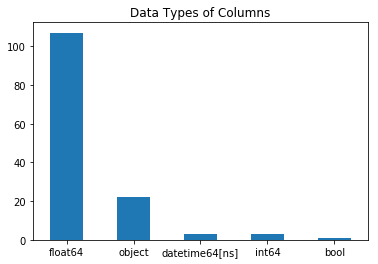

In [8]:
# Show data types of columns in numbers
df.dtypes.value_counts().plot.bar(rot=0)
plt.title("Data Types of Columns")

In [9]:
# Data types of columns
df.dtypes.value_counts()

float64           107
object             22
datetime64[ns]      3
int64               3
bool                1
dtype: int64

##### Missing Values

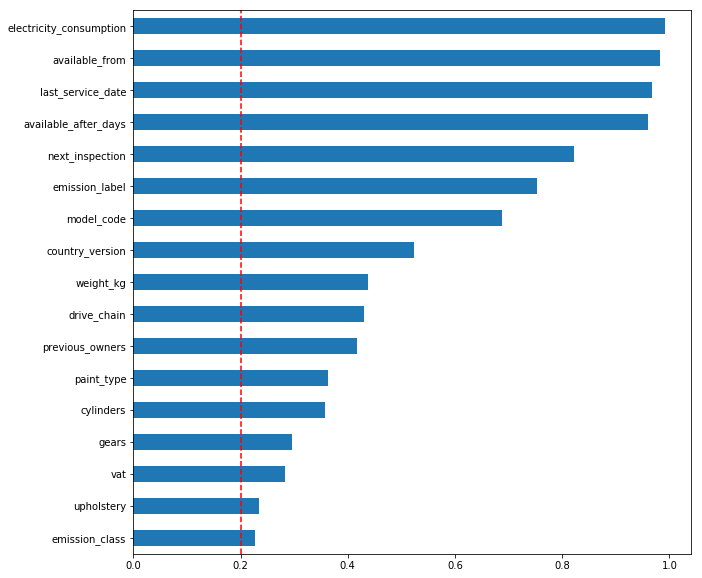

In [10]:
# Percentage of missing values withing columns (new dataset with missing values > 0)
ax = df.isnull().mean()[df.isnull().mean() > 0.2].sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.2, color='r', linestyle='--')

In [11]:
# Total number of missing cells
df.isnull().sum(axis=1).sum()

297747

In [12]:
# Rows without any missing value
df[df.isnull().sum(axis=1) == 0].shape ### No full rows!!

(0, 136)

In [13]:
# Columns without any missing

_ = (~df.isnull()).all(axis=0)
_[_]

make                    True
model                   True
description             True
next_inspection_bool    True
gearing_type            True
inspection_new          True
price                   True
fuel                    True
warranty                True
url                     True
dtype: bool

In [14]:
df.loc[:, df.isnull().mean() == 0].columns

Index(['make', 'model', 'description', 'next_inspection_bool', 'gearing_type',
       'inspection_new', 'price', 'fuel', 'warranty', 'url'],
      dtype='object')

##### Pandas-profiling

In [15]:
# Drop 'body_type' column (duplicate of 'body')
df.drop('body_type', axis=1, inplace = True)

# Drop 'next_inspection' column (created a new column 'next_inspection_bool')
df.drop('next_inspection', axis=1, inplace = True)
#### Cleaning functions updated

In [16]:
# import pandas_profiling
# #df.profile_report()

# profile = df.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="output.html")

#### Univariate EDA

##### Categorical Data

###### Make

In [17]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

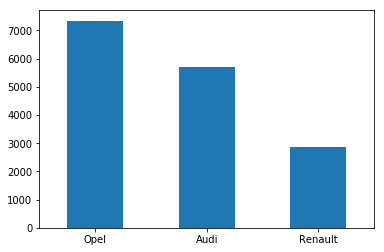

In [18]:
df.make.value_counts().plot.bar(rot=0)

###### Model

In [19]:
df.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [20]:
# Number of auto make-models
df.groupby(['make','model']).size()

make     model   
Audi     A1          2614
         A2             1
         A3          3097
Opel     Astra       2526
         Corsa       2219
         Insignia    2598
Renault  Clio        1839
         Duster        34
         Espace       991
dtype: int64

###### Body Type (Body)

In [21]:
df.body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

###### Body Color

In [22]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

###### Fuel > Needs feature engineering

We need to create 2/3 categories: Gasoline, Diesel, (electric, LPG). For instance, we should put, "super 95", "Benzine", and "Regular" to `Gasoline` category.

In [23]:
df.fuel.isna().sum()

0

In [24]:
df.fuel.nunique()

77

In [25]:
df.fuel.value_counts()[:10]

Diesel (Particulate Filter)                4315
Super 95                                   3338
Gasoline                                   3175
Diesel                                     2984
Super 95 / Regular/Benzine 91               424
Regular/Benzine 91                          354
Super E10 95                                331
Super 95 (Particulate Filter)               268
Super 95 / Super E10 95                     131
Regular/Benzine 91 (Particulate Filter)     100
Name: fuel, dtype: int64

In [26]:
# fuel_dict = {r'Diesel.*': 'diesel', 
#              r'(Gasoline|Super|Regular).*': 'gasoline',
#              r'.*(LPG|CNG|gas).*': 'lpg', 
#              r'Electric.*':'electric',
#              r'Others.*': np.nan
#             }
# df.fuel.replace(fuel_dict, regex = True, inplace=True)
# df.fuel.value_counts(dropna=False)

# #### Update 'Feature Engineering' function!!!

###### Drive Chain

Ornek: 4 cekerli, onden cekerli arkadan cekerli

In [27]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

###### Next Inspection

In [28]:
#df.next_inspection.value_counts(dropna=False).head()

In [29]:
#df.next_inspection[18]

In [30]:
#df.next_inspection.value_counts(dropna=False).head()

###### Gears

> Categorical feature >> type = 'numeric' or 'object' ????

In [31]:
# Number of uniques and unique values in 'gears' column
# df.gears.nunique(), df.gears.unique()

There are wrong entries in `gears` column. Those should be replaced with NaN, and then filled with proper gear values.

In [32]:
# df.gears.value_counts(dropna=False)

In [33]:
# df[df.gears == '1']

###### Dummy Columns

In [34]:
# Select the dummy columns
df.loc[:, df.columns.str.contains('ss_|cc_|^ext_|ent', regex=True)].shape
##> REGEX: '^'(Caret.) Matches the start of the string


##### Get_dummies ile olusturulan sutunlari filtrelemek icin daha iyi bir isimlendirmeye ihtiyac var.
##### Ornegin 'column name'in "_" ile baslamasi

##### Kendi aramizda dummy sutunlar icin isimlendirme standardizasyonu >>> Tam isim mi, kisalma mi?

(15919, 95)

In [35]:
dummy_prefixes = ['ss_', 'cc_', 'ext_', 'ent_']

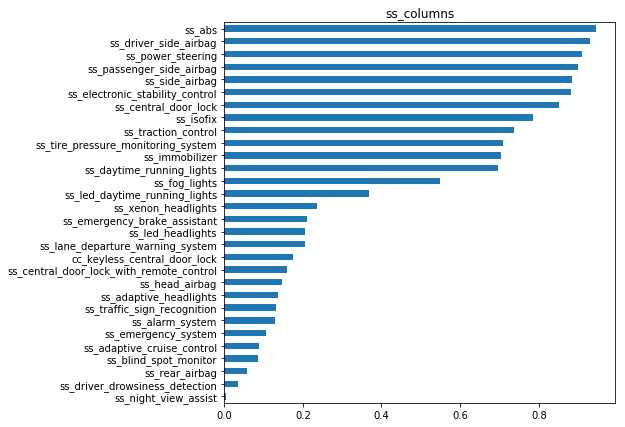

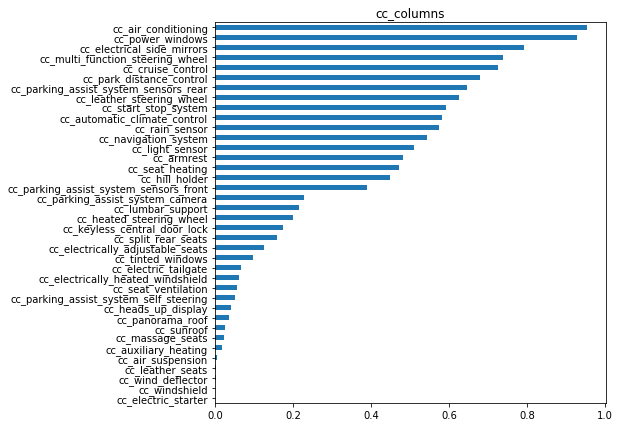

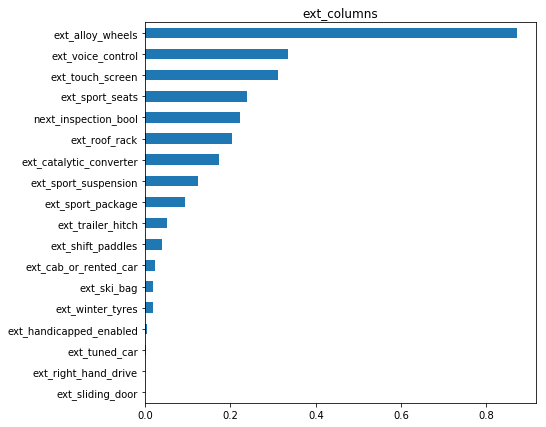

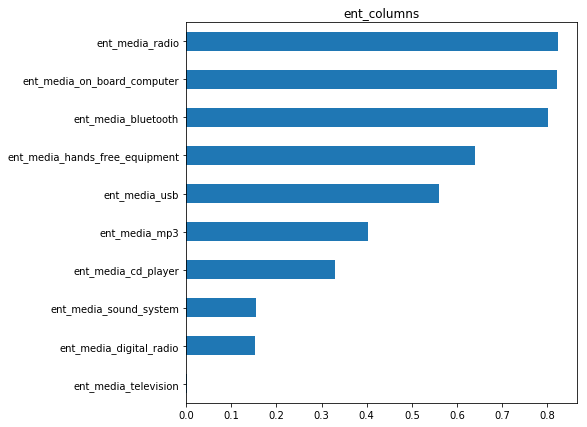

In [36]:
# Percentage '1's in Dummy columns
for i in dummy_prefixes:
    df.filter(like = i, axis = 1).mean().sort_values().plot.barh(figsize=(7,7))
    plt.title(i + "columns")
    plt.show()

##>> There seems to be many properties which are not very common among cars
##>>> However, those properties might prove more significant since the ones -such as ABS- 
##>>>> of which almost all the cars have may not affect the price

##### Numerical Data

In [37]:
# Show colums of which data types is 'object'
df.describe()

,co2_emission,cylinders,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,gears,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,available_after_days,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
count,13483.000000,10239.000000,15423.000000,15831.000000,14895.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000,13036.000000,11207.000000,15919.000000,15919.000000,14322.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,635.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,8945.000000
mean,117.953942,3.797343,1423.540881,88.367696,34130.127828,0.945973,0.087233,0.136641,0.128674,0.086430,0.850706,0.160474,0.697061,0.033876,0.930709,0.882841,0.210953,0.105510,0.549776,0.146348,0.702885,0.786236,0.368615,0.205195,0.204459,0.005021,0.899444,0.910424,0.057977,0.883912,0.709915,0.736694,0.132289,0.236928,4.784527,5.924601,0.224260,18019.896727,1.542382,0.800963,0.329392,0.153249,0.639739,0.402406,0.820763,0.824270,0.154005,0.002406,0.560880,76.725984,...,0.000067,0.066871,0.792119,0.124408,0.062471,0.040403,0.201147,0.449697,0.174212,0.003200,0.625775,0.511501,0.215081,0.024002,0.738916,0.544436,0.036736,0.679379,0.228082,0.051203,0.389226,0.646

###### Price

The data is **not** randomly sampled. The results may be different than the original statistics.

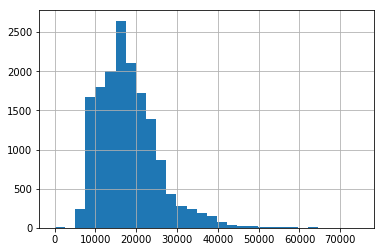

In [38]:
df.price.hist(bins=30)

In [39]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

###### CO2 Emission

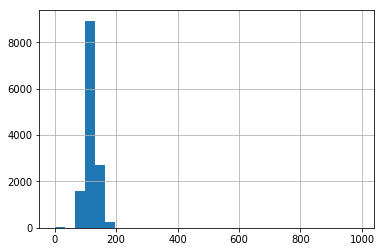

In [40]:
df.co2_emission.hist(bins=30)

In [41]:
df.co2_emission.describe()

count    13483.000000
mean       117.953942
std         20.245589
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max        990.000000
Name: co2_emission, dtype: float64

In [42]:
# Number of rows with co2_emission > 200
sum(df.co2_emission > 200)

4

In [43]:
# Show the ads with co2_emission > 200
df[df.co2_emission > 200]

#### Possibly wrong entries. Needs to be replaced by NaNs.

,co2_emission,country_version,cylinders,displacement,make,model,model_code,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
535,331.0,NaN,8.0,999.0,Audi,A1,0588/BDB,Sicherheit: Deaktivierung für Beifahrer-Airbag...,70.0,41200.0,33358088,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,True,1.0,NaT,Compact,Silver,Manual,NaN,1,NaT,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4556,990.0,NaN,NaN,1598.0,Audi,A3,NaN,Sicherheit: Deaktivierung für Beifahrer-Airbag...,81.0,27815.0,2481101,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,False,3.0,NaT,Sedans,Grey,Automatic,NaN,0,NaT,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10513,253.0,Germany,NaN,NaN,Opel,Insignia,NaN,Sicherheit: Deaktivierung für Beifahrer-Airbag...,239.0,145000.0,B-44,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,1.0,NaT,Station wagon,Red,Automatic,NaN,0,NaT,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN
10771,239.0,NaN,6.0,2967.0,Opel,Insignia,NaN,Sicherheit: Deaktivierung für Beifahrer-Airbag...,100.0,185000.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True,9.1,NaT,Station wagon,White,Automatic,6.0,0,2019-02-01,Metallic,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2295.0


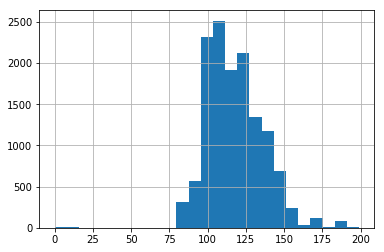

In [44]:
df.co2_emission[df.co2_emission<200].hist(bins=25)
##### The values higher than 175 may still be problematic

###### Displacement

>Problematic max and min values

*__What is Displacement?:__ Engines are measured by displacement, usually expressed in liters (L) or cubic centimeters (cc). Displacement is the total volume of all the cylinders in an engine.*

[Car Engine Size Capacity | Displacement List (CC) | CI](http://www.autosnout.com/Cars-Engine-Size-List.php)

In [45]:
df.displacement.describe()

count    15423.000000
mean      1423.540881
std        333.530658
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement, dtype: float64

In [46]:
# Number of rows with displacement > 3000
sum(df.displacement > 3000) 

2

In [47]:
# Number of rows with displacement < 100
sum(df.displacement < 100) 

39

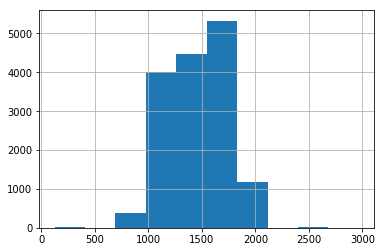

In [48]:
# Histogram of displacement (with values between 100 an 3000)
df.displacement[(df.displacement < 3000) & (df.displacement > 100)].hist()

###### HP

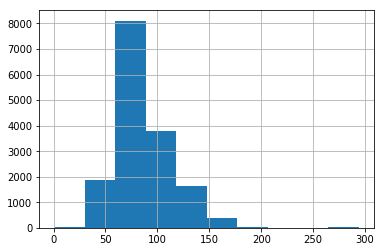

In [49]:
df.hp.hist()

In [50]:
df.hp.describe()

count    15831.000000
mean        88.367696
std         26.835135
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

In [51]:
# Number of rows with hp < 50
sum(df.hp < 50) 

25

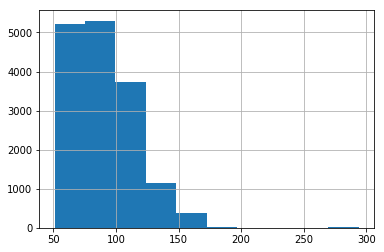

In [52]:
df.hp[df.hp > 50].hist()

#### max may also be problematic

###### Previous Owners

In [53]:
df.previous_owners.value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

###### Cylinders

In [54]:
df.cylinders.value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: cylinders, dtype: int64

###### Electricity Consumption

In [55]:
df[~df.electricity_consumption.isna()].electricity_consumption.head()

21     0
49     0
72     0
83     0
167    0
Name: electricity_consumption, dtype: object

In [56]:
df.electricity_consumption.isna().mean()

0.9913939317796344

#### Multivariate EDA

##### Make-Model

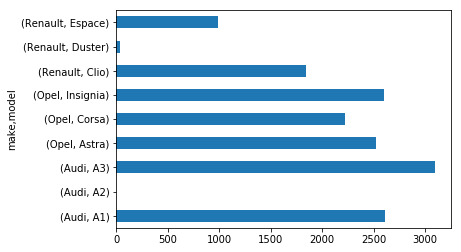

In [57]:
df.groupby(['make', 'model']).size().plot.barh()

##### Make-Model vs Price

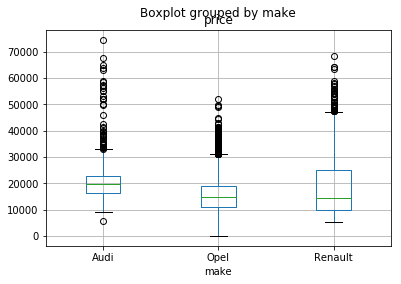

In [58]:
df.boxplot(column="price", by='make')

> I would expect Audi as being the most expensive car. In terms of mean values, Audi seems to be the highest. However, IQR's show a different picture. This result needs to be further investigated. This problem is possibly becauese of scraping of only a small portion of auto makes-models.

In [59]:
df.groupby('make').price.describe()

,count,mean,std,min,25%,50%,75%,max
make,,,,,,,,
Audi,5712.0,20022.278711,4909.547072,5555.0,16186.75,19890.0,22900.0,74600.0
Opel,7343.0,16379.397249,7071.499895,13.0,10990.00,14990.0,18989.0,52120.0
Renault,2864.0,18232.390363,10585.712252,5445.0,9999.00,14503.0,24900.0,68320.0


##### Price vs Age, Km, Hp

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


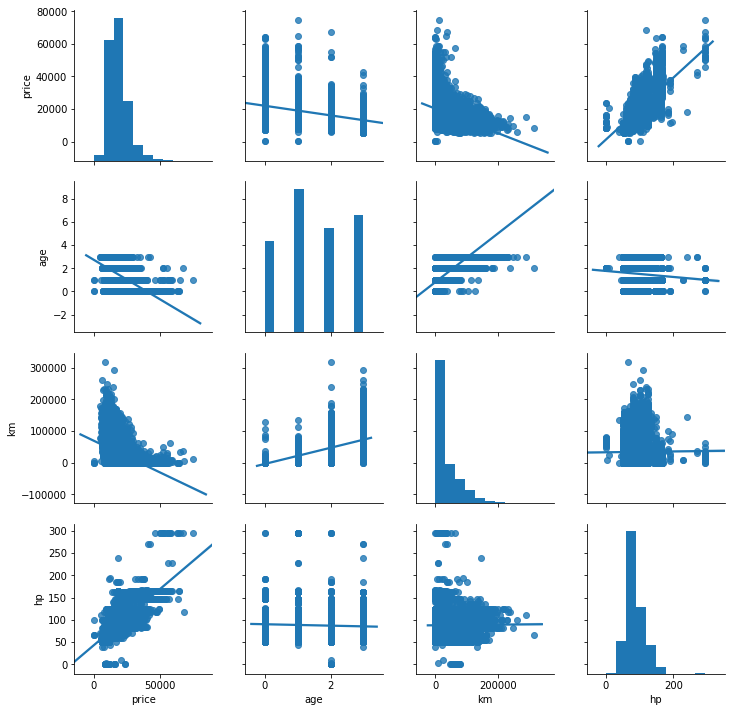

In [60]:
# Create a scatter matrix
sns.pairplot(df[['price', 'age', 'km', 'hp']], kind="reg")

##### Cylinders vs Displacement

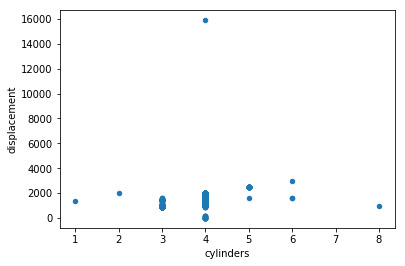

In [61]:
df.plot.scatter('cylinders', 'displacement')

##### Dummy Columns vs Price

In [62]:
# Create a new column with sum of dummy values (total number of car attributes)
ss_sum = df.filter(like="ss_").sum(axis=1)
cc_sum = df.filter(like="cc_").sum(axis=1)
ext_sum = df.filter(like="ext_").sum(axis=1)
ent_sum = df.filter(like="ent_").sum(axis=1)

#### Update 'Feature Engineering' functions

In [63]:
# # Create a new column with sum of dummy values (total number of car attributes)
# df['ss_sum'] = df.filter(like="ss_").sum(axis=1)
# df['cc_sum'] = df.filter(like="cc_").sum(axis=1)
# df['ext_sum'] = df.filter(like="ext_").sum(axis=1)
# df['ent_sum'] = df.filter(like="ent_").sum(axis=1)

# #### Update 'Feature Engineering' functions

In [64]:
# Create a scatter matrix
# sns.pairplot(pd.DataFrame(df['price'], ss_sum, cc_sum, ext_sum, ent_sum), kind="reg")

In [65]:
# # Create a scatter matrix
# sns.pairplot(df[['price', 'ss_sum', 'cc_sum', 'ext_sum', 'ent_sum']], kind="reg")

##### Correlation - Heatmap

In [66]:
# Select non-dummy columns
non_dummy = df.loc[:, ~df.columns.str.contains('ss_|cc_|^ext_|ent_', regex=True)]

# join non-dummy and dummy sums
# non_dummy = non_dummy.join(df.ss_sum).join(df.cc_sum).join(df.ext_sum).join(df.ent_sum)

Text(0.5, 1.0, 'Correlation Heatmap of Non-Dummy Variables')

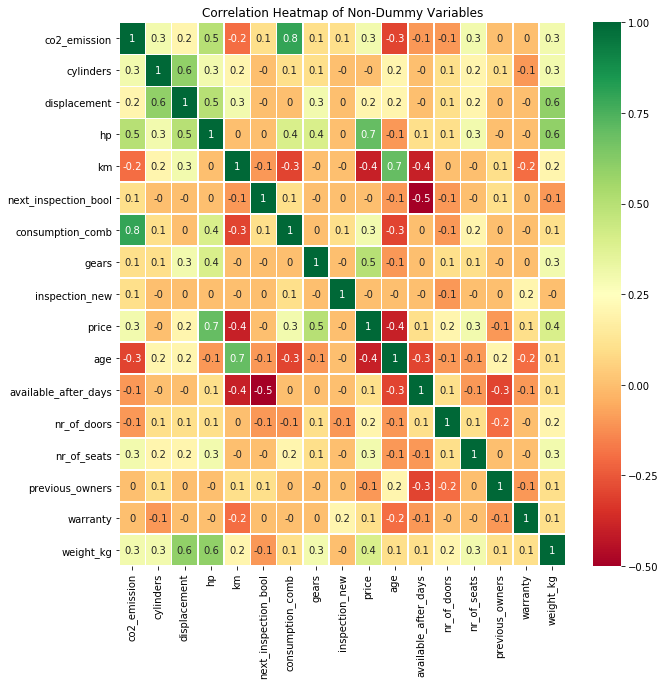

In [67]:
# Add figure size
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(non_dummy.corr().round(1), linewidths=.5, cmap="RdYlGn", annot=True)
ax.set_title('Correlation Heatmap of Non-Dummy Variables')

Text(0.5, 1.0, 'Correlation Heatmap of Non-Dummy Variables')

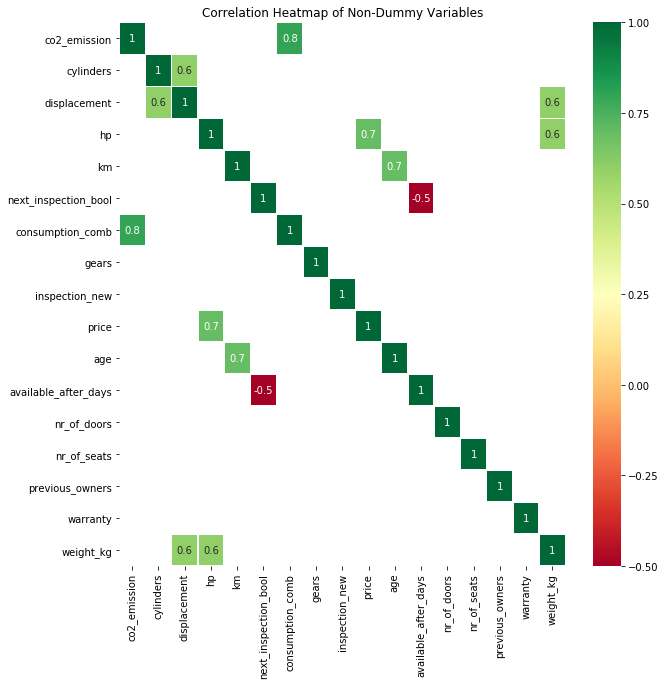

In [68]:
# Add figure size
plt.figure(figsize=(10,10))

# Plot heatmap of correlations (Greater than 0.5 or less than -0.5)
ax = sns.heatmap(non_dummy.corr()[(non_dummy.corr()>0.5) | (non_dummy.corr()<-0.5)].round(1), linewidths=.5, cmap="RdYlGn", annot=True)
ax.set_title('Correlation Heatmap of Non-Dummy Variables')

## To Do

Things to do next:

* General
    - Missing Value and Outlier analysis
        + Which techniques to choose
    - Feature Engineering
        + Creating new columns for Fraud Detection (User entry -- Yes/No)
        + Creating Dummy Variables
    - Feature Scaling
* Columns
    - co2_emission > Values higher than 200 (or even 175) should be replaced with NaN
    - displacement > Some max and min values (lower than 100, higher than 2500-3000) are wrong and should be replaced with NaN
    - hp > values lower than 50 and higher than 200-300 may be problematic
    - price > min value is problematic. We may drop it for price prediction, however we may need to keep it for fraud detection.
    - prev_owner > Drop 'prev_owner' column. Update "Data Cleaning"
    - body_type > Drop duplicate 'body_type' column.

### Missing Values

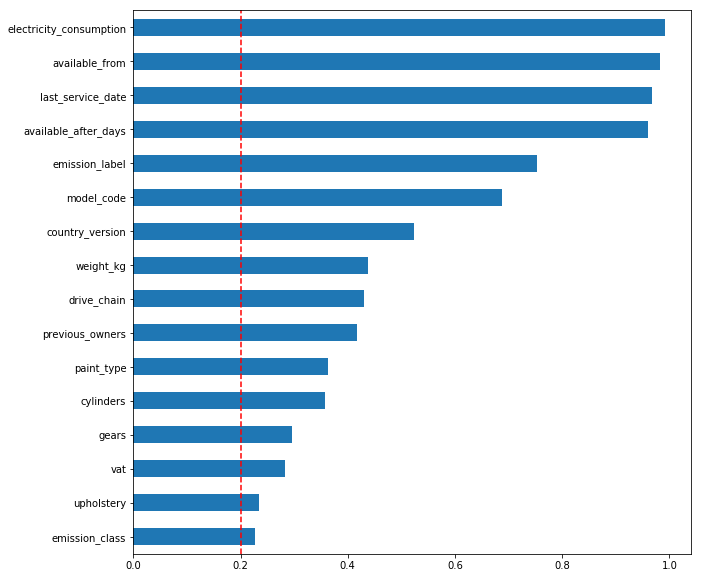

In [69]:
# Percentage of missing values withing columns (new dataset with missing values > 0)
ax = df.isnull().mean()[df.isnull().mean() > 0.2].sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.2, color='r', linestyle='--')

In [70]:
# Columns without any missing

_ = (~df.isnull()).all(axis=0)
_[_]

make                    True
model                   True
description             True
next_inspection_bool    True
gearing_type            True
inspection_new          True
price                   True
fuel                    True
warranty                True
url                     True
dtype: bool

In [71]:
columns_to_keep = ['emission_class', 'consumption', 'nr.of seats']

In [72]:
# Create a new DataFrame with columns < 0.2 missing
df_new = df.loc[:, df.isnull().mean() < 0.2].copy()
df_new.shape

(15919, 118)

In [73]:
# Check how many rows in the new dataset are without any missing value
df_new.loc[df_new.isna().sum(axis=1) == 0, :].shape

(6575, 118)

In [74]:
df_new.dropna(how='any').shape

(6575, 118)

In [75]:
df_new.isna().sum()

co2_emission                                2436
displacement                                 496
make                                           0
model                                          0
description                                    0
hp                                            88
km                                          1024
offer_number                                3175
ss_abs                                       982
ss_adaptive_cruise_control                   982
ss_adaptive_headlights                       982
ss_alarm_system                              982
ss_blind_spot_monitor                        982
ss_central_door_lock                         982
ss_central_door_lock_with_remote_control     982
ss_daytime_running_lights                    982
ss_driver_drowsiness_detection               982
ss_driver_side_airbag                        982
ss_electronic_stability_control              982
ss_emergency_brake_assistant                 982
ss_emergency_system 

#### CO2 Emission

In [76]:
df_new.co2_emission.isna().mean()

0.15302468748036938

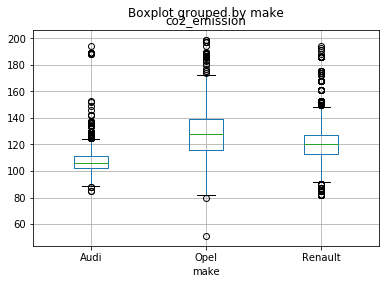

In [77]:
df_new[(df_new.co2_emission < 200) & (df_new.co2_emission > 50)].boxplot("co2_emission", by="make")
# df_new.boxplot("co2_emission", by=["make", "model"])

In [78]:
df_new.groupby(['make', 'model']).co2_emission.describe()

count        mean        std    min    25%    50%    75%  \
make    model                                                                 
Audi    A1        2304.0  104.404514   8.700073   89.0   98.0  104.0  109.0   
        A2           0.0         NaN        NaN    NaN    NaN    NaN    NaN   
        A3        2748.0  109.094614  19.929028    1.0  103.0  107.0  114.0   
Opel    Astra     2087.0  115.276953  17.040923    0.0  102.0  119.0  127.0   
        Corsa     1950.0  128.272821  13.111959   12.0  120.0  128.0  139.0   
        Insignia  2099.0  135.166270  18.850156    0.0  126.0  137.0  145.0   
Renault Clio      1511.0  111.890801  17.442298   82.0   92.0  118.0  126.0   
        Duster      33.0  171.666667  34.375379    1.0  150.0  186.0  186.0   
        Espace     751.0  134.316911  17.972148  116.0  120.0  123.0  153.0   

                    max  
make    model            
Audi    A1        331.0  
        A2          NaN  
        A3        990.0  
Opel    Astra     174.0  
        Corsa     170.0  
        Insignia  253.0  
Renault Clio      140.0  
        Duster    186.0  
        Espace    194.0

Duster has an emission level of 155g max, according to [this](https://www.carbuyer.co.uk/reviews/dacia/duster/suv/64147/mpg).

In [79]:
df_new.groupby(['make', 'model']).co2_emission.mean()

make     model   
Audi     A1          104.404514
         A2                 NaN
         A3          109.094614
Opel     Astra       115.276953
         Corsa       128.272821
         Insignia    135.166270
Renault  Clio        111.890801
         Duster      171.666667
         Espace      134.316911
Name: co2_emission, dtype: float64

### Outliers

In [80]:
# # Select numeric columns (without dummies)
# df_numeric = df.select_dtypes('number').loc[:, ~df_numeric.columns.str.contains('ss_|cc_|^ext_|ent_', regex=True)]
# df_numeric.describe()

In [81]:
# Create a list of columns for outlier analysis
column_list = ["co2_emission", "displacement", "hp", "consumption_comb"]
pd.DataFrame({'min':df_new[column_list].min(), 'max':df_new[column_list].max()})

,min,max
co2_emission,0.0,990.0
displacement,1.0,16000.0
hp,1.0,294.0
consumption_comb,0.0,9.1


In [82]:
def detect_replace_outliers(data, columns, thres):
    '''
    Detects outliers and replace them with NaN in a conservative way to
    prepare data for initial modeling. Specific threshold or limit for each
    feature can be used for better results. This function needs to be
    revisited for further analyis! 
    '''
    data_new = data[columns].copy()
    Q1 = data_new.quantile(0.25)
    Q3 = data_new.quantile(0.75)
    IQR = Q3 - Q1
    limit = thres * IQR
    
    return data_new[(data_new > Q1 - limit) & (data_new < Q3 + limit * 5)]

df_new[column_list] = detect_replace_outliers(df_new, column_list, 1.5)

In [83]:
pd.DataFrame({'min':df[column_list].min(), 'max':df[column_list].max()})

,min,max
co2_emission,0.0,990.0
displacement,1.0,16000.0
hp,1.0,294.0
consumption_comb,0.0,9.1


### Preparation for Initial Modeling

In [84]:
df_new.dropna().shape

(6562, 118)

In [85]:
drop_list = ['offer_number', 'description', 'short_description', 'url', 'next_inspection_bool']

df_new.drop(drop_list, axis=1).dropna().shape

(8984, 113)

In [86]:
# Prepare data for initial modeling

# Create a drop list for unnecessary columns
drop_list = ['offer_number', 'description', 'short_description', 'url', 'next_inspection_bool']

# Drop unnecessary columns
df_new.drop(drop_list, axis=1, inplace=True)

# Drop rows with NaNs
df_new.dropna(inplace=True)

# Save the new dataset to pickle
df_new.to_pickle('scout_no_missiing.pkl')